In [1]:
# This notebook mainly focus on Linear Regression.

# Author for this NoteBook: Ijaz Ahmad
# Ref: Machine Learnig with Python (coursera)

In [2]:
# importing libaries...
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pylab as pl
%matplotlib inline

In [3]:
!curl https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv -o FuelConsumptionCo2.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:02 --:--:--     0
  0     0    0     0    0     0      0      0 --:--:--  0:00:02 --:--:--     0
 45 72629   45 32768    0     0   9417      0  0:00:07  0:00:03  0:00:04  9429
100 72629  100 72629    0     0  18301      0  0:00:03  0:00:03 --:--:-- 18322


In [4]:
df = pd.read_csv("FuelConsumptionCo2.csv")
df.head(5)

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [5]:
# print feature columns and length of the file...
features = df.columns
print("Features: ", features)

print(df.shape)

Features:  Index(['MODELYEAR', 'MAKE', 'MODEL', 'VEHICLECLASS', 'ENGINESIZE', 'CYLINDERS',
       'TRANSMISSION', 'FUELTYPE', 'FUELCONSUMPTION_CITY',
       'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB',
       'FUELCONSUMPTION_COMB_MPG', 'CO2EMISSIONS'],
      dtype='object')
(1067, 13)


In [7]:
# Exploring Dataset...
desriptive_Analys = df.describe()
desriptive_Analys

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [8]:
# selet some features...
dff = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
dff.head(5)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244


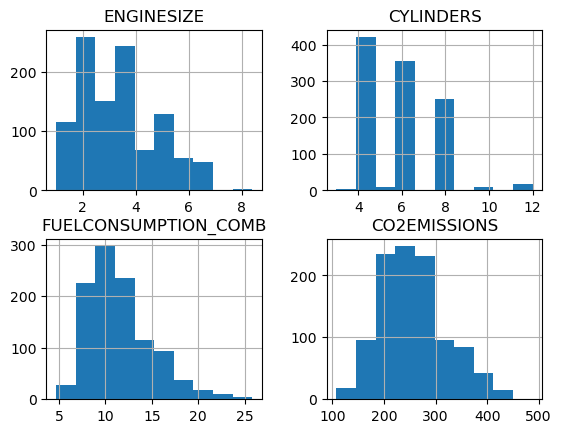

In [10]:
# we can plot the above features to explore more.. and visulize
dff.hist()
plt.show()

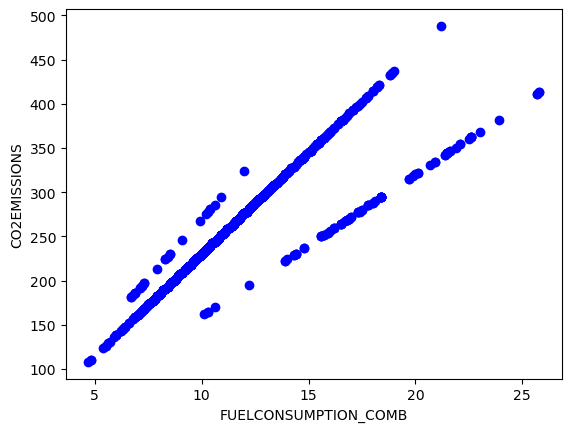

In [11]:
# plot each feature with target feature to check their linear relation...
# for this we use scatter plot 

plt.scatter(dff.FUELCONSUMPTION_COMB, dff.CO2EMISSIONS, color = "blue")
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("CO2EMISSIONS")
plt.show()

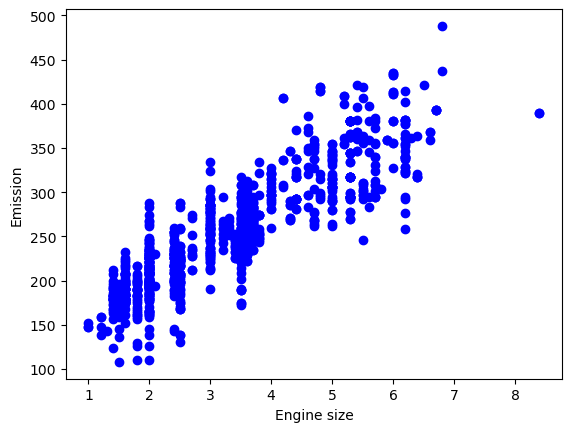

In [13]:
plt.scatter(dff.ENGINESIZE, dff.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

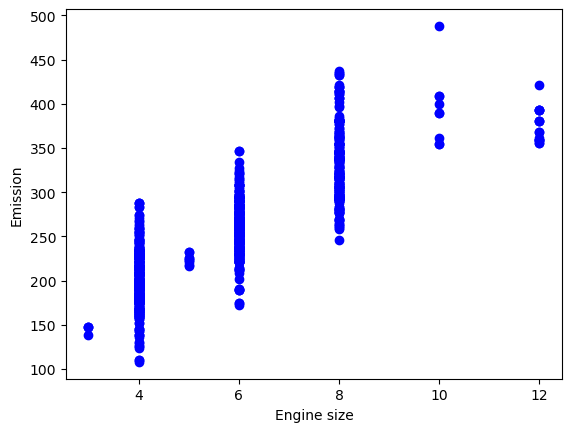

In [14]:
plt.scatter(dff.CYLINDERS, dff.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

In [15]:
# now we can divide our dataset to train the model and then
# evaluate it. 

msk = np.random.rand(len(dff)) < 0.8
train = dff[msk]
test = dff[~msk]

In [16]:
print("Training Prem: ", len(train), "Testing Prem: ", len(test))

Training Prem:  832 Testing Prem:  235


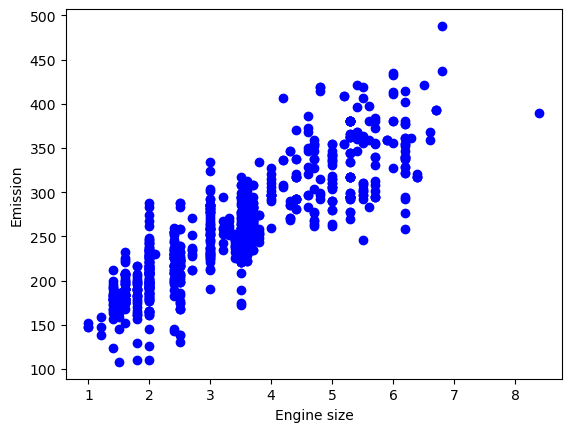

In [17]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

In [19]:
# import model from sklearn...
from sklearn.linear_model import LinearRegression

# also import warning lib to hide the warnings...
import warnings 
warnings.filterwarnings("ignore")

In [20]:
# onvert the dataset into np arrays...
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])

clf = LinearRegression()
clf.fit(train_x, train_y) # train the model
# The coefficients
print ('Coefficients: ', clf.coef_)
print ('Intercept: ',clf.intercept_)

Coefficients:  [[38.82529666]]
Intercept:  [126.23765928]


Text(0, 0.5, 'Emission')

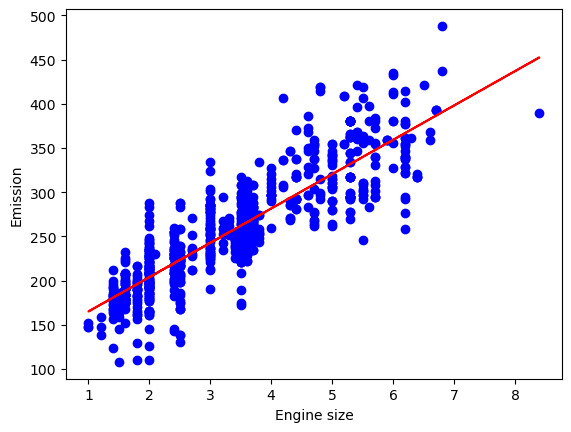

In [23]:
# now plot the fit line over the dataset to evaluate further...
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.plot(train_x, clf.coef_[0][0]*train_x + clf.intercept_[0], '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")

In [28]:
# Calulate the ERROR...
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])

# get predictions
predic = clf.predict(test_x)

In [29]:
print("Mean absolute error: %.2f" % np.mean(np.absolute(predic - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((predic - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y , predic) )

Mean absolute error: 22.83
Residual sum of squares (MSE): 906.31
R2-score: 0.79


In [30]:
# END --- Happy Coding